## Find the probabilty of two adults having same birth days in a group of 60 adults using Relative Frequency Approach

* Generate Random samples 
* Construct a realistic date to find the probability. 
* Birth year of an adult can be between 1950 to this year

###### Import libraries

In [16]:
import random
from datetime import datetime 
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

###### Constants 

In [17]:
BASE_YEAR = 1950
ADULTS = 60
TRAILS = 10000

###### Find a random year between 1950 to till this year

In [18]:
def random_year():
    return random.randint(BASE_YEAR,datetime.today().year)

###### Find a random month

In [19]:
def random_month():
    return random.randint(1,12)

###### Find a random day

In [20]:
def random_day(year,month):
    
    end_day = calendar.monthrange(year,month)[1]
    return random.randint(1,end_day)

###### Generate random birth days for n adults 
 * Generate random birth days for n adults
 * *__adults_birthdays__* will maintain "month_day" as a key and the number of occurence as value for a particular trail 

In [21]:
def generate_birthdays(adults):
    adults_birthdays = {}
    for index in range(1,adults):

        year = random_year()
        month = random_month()
        birthday = f'{month}_{random_day(year,month)}'

        if birthday in adults_birthdays:
            adults_birthdays[birthday] += 1
        else:
            adults_birthdays[birthday] = 1
            
    return adults_birthdays

###### Series of trails

* Identify & count the recurrent birth days for each trail 
* Identify & count the non-recurrent birth days for each trail (only for visualization)
* *__trail_dict__* will maintain a trail and its corresponding count of recurrent / non recurrent birth days

In [22]:
def trails(adults,tr):

    trails_dict = {}
    for trail in range(1,tr+1):
        non_recurrence = 0 
        recurrence = 0
        adults_birthdays = generate_birthdays(adults)
        for birth_day in adults_birthdays:
            if adults_birthdays[birth_day] > 1:
                recurrence += 1
            else:
                non_recurrence += 1
        trails_dict[trail] = [non_recurrence,recurrence]
    
    return trails_dict

###### Run trails for a given inputs
* *__trails_step_dict__* will capture the relative frequecy after each trails for graphical view
* Display the probabilities of recurrence and non recurrence

In [23]:
def run_trails(adults=ADULTS,tr=TRAILS):
    
    trails_dict = trails(adults,tr)
    trails_step_dict = {}
    non_recurrence_count = 0
    recurrence_count = 0
    for trail in sorted(trails_dict): 
        if trails_dict[trail][1] == 0:
            non_recurrence_count += 1
        else:
            recurrence_count += 1
        
        trails_step_dict[trail] = [(non_recurrence_count/trail)*100,(recurrence_count/trail)*100]
    
    print (f'{tr} trails with {adults} adults')
    print (f'Probability of an event A (two adults having same birthday in a group of {adults} \
adults) is {(recurrence_count/tr)*100:2.2f}%')
    print (f'Probability of an event B (no two adults having same birthday in a group of {adults} \
adults) is {(non_recurrence_count/tr)*100:2.2f}%')
    
    
    return trails_step_dict

##### Run 10000 trails for 60 adults

In [24]:
trails_step_dict = run_trails()

10000 trails with 60 adults
Probability of an event A (two adults having same birthday in a group of 60 adults) is 99.35%
Probability of an event B (no two adults having same birthday in a group of 60 adults) is 0.65%


In [25]:
trails_df = pd.DataFrame.from_dict(trails_step_dict,orient='index').reset_index()
trails_df.columns = ['trail','p_no_same_bdays','p_same_bdays']

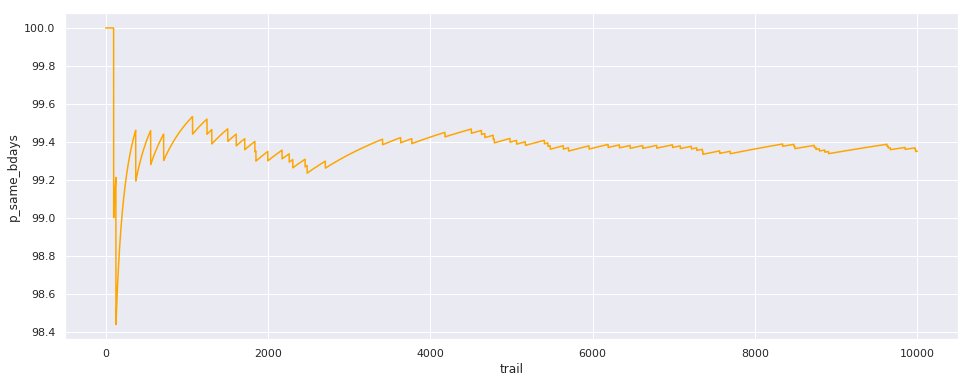

In [26]:
plt.figure(figsize=(16, 6))
ax_ps = sns.lineplot(x="trail", y="p_same_bdays", color="orange",data=trails_df)

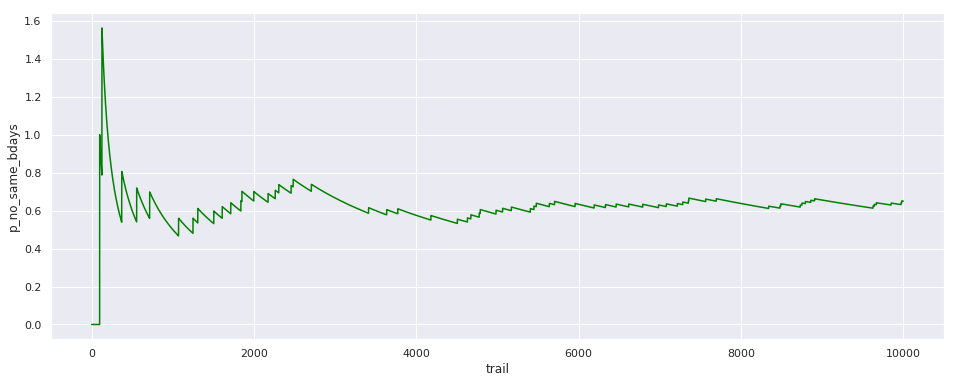

In [28]:
plt.figure(figsize=(16, 6))
ax_pns = sns.lineplot(x="trail", y="p_no_same_bdays", color="green",data=trails_df)

###### Output for 100000 trails with n adults. n =[10,20,30,40,50,60,100]

```
run_trails(adults=10,tr=100000)
run_trails(adults=20,tr=100000)
run_trails(adults=30,tr=100000)
run_trails(adults=40,tr=100000)
run_trails(adults=50,tr=100000)
run_trails(adults=60,tr=100000)
run_trails(adults=100,tr=100000)
```
Output
```
100000 trails with 10 adults
Probability of an event A (two adults having same birthday in a group of 10 adults) is 9.45%
Probability of an event B (no two adults having same birthday in a group of 10 adults) is 90.55%
100000 trails with 20 adults
Probability of an event A (two adults having same birthday in a group of 20 adults) is 37.98%
Probability of an event B (no two adults having same birthday in a group of 20 adults) is 62.02%
100000 trails with 30 adults
Probability of an event A (two adults having same birthday in a group of 30 adults) is 67.92%
Probability of an event B (no two adults having same birthday in a group of 30 adults) is 32.08%
100000 trails with 40 adults
Probability of an event A (two adults having same birthday in a group of 40 adults) is 87.75%
Probability of an event B (no two adults having same birthday in a group of 40 adults) is 12.25%
100000 trails with 50 adults
Probability of an event A (two adults having same birthday in a group of 50 adults) is 96.71%
Probability of an event B (no two adults having same birthday in a group of 50 adults) is 3.29%
100000 trails with 60 adults
Probability of an event A (two adults having same birthday in a group of 60 adults) is 99.31%
Probability of an event B (no two adults having same birthday in a group of 60 adults) is 0.69%
100000 trails with 100 adults
Probability of an event A (two adults having same birthday in a group of 100 adults) is 100.00%
Probability of an event B (no two adults having same birthday in a group of 100 adults) is 0.00%
```